# Sentiment Analysis on Textual Data

This notebook demonstrates sentiment analysis on textual data using Natural Language Processing (NLP) techniques. 

## 1. Setup and Dependencies

In [10]:
# Ensure seaborn is up to date to avoid ImportError
%pip install --upgrade seaborn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to C:\Users\Gayathri
[nltk_data]     Prasad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Gayathri
[nltk_data]     Prasad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Gayathri
[nltk_data]     Prasad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Gayathri
[nltk_data]     Prasad\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## 2. Data Loading and Exploration


In [11]:
# Sample data (replace with your own dataset)
data = {
    'text': [
        'This movie was fantastic! I loved every minute of it.',
        'Terrible waste of time. Would not recommend.',
        'Pretty good movie, but could have been better.',
        'Absolutely horrible experience. Worst movie ever.',
        'Great acting and amazing storyline!'
    ],
    'sentiment': [1, 0, 1, 0, 1]  # 1 for positive, 0 for negative
}

df = pd.DataFrame(data)
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (5, 2)


,text,sentiment
0,This movie was fantastic! I loved every minute...,1
1,Terrible waste of time. Would not recommend.,0
2,"Pretty good movie, but could have been better.",1
3,Absolutely horrible experience. Worst movie ever.,0
4,Great acting and amazing storyline!,1


## 3. Data Preprocessing

I implement several preprocessing steps:
1. Text cleaning
2. Tokenization
3. Stop words removal
4. Lemmatization

In [12]:
import nltk
nltk.download('punkt_tab')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

# Apply preprocessing to the text column and create 'processed_text'
df['processed_text'] = df['text'].apply(preprocess_text)

# Display the results
print("Original vs Processed Text:")
for orig, proc in zip(df['text'][:2], df['processed_text'][:2]):
    print(f"Original: {orig}")
    print(f"Processed: {proc}\n")

Original vs Processed Text:
Original: This movie was fantastic! I loved every minute of it.
Processed: movie fantastic ! loved every minute .

Original: Terrible waste of time. Would not recommend.
Processed: terrible waste time . would recommend .



[nltk_data] Downloading package punkt_tab to C:\Users\Gayathri
[nltk_data]     Prasad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## 4. Feature Extraction
I use TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to convert text into numerical features.

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], 
    df['sentiment'], 
    test_size=0.2, 
    random_state=42
)

# Create and fit the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Training set shape:", X_train_tfidf.shape)
print("Testing set shape:", X_test_tfidf.shape)

Training set shape: (4, 18)
Testing set shape: (1, 18)


## 5. Model Training and Evaluation

Classification Report:


c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricW

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



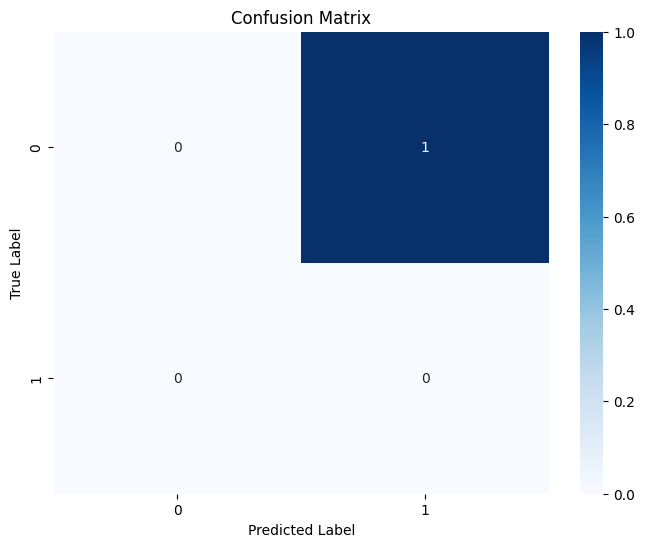

In [14]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## 6. Model Application and Insights

In [15]:
# Function to predict sentiment of new text
def predict_sentiment(text):
    # Preprocess the text
    processed = preprocess_text(text)
    # Transform to TF-IDF features
    features = tfidf.transform([processed])
    # Predict
    prediction = model.predict(features)[0]
    sentiment = "Positive" if prediction == 1 else "Negative"
    return sentiment

# Test the model with new examples
test_texts = [
    "This product exceeded my expectations!",
    "I regret buying this, very disappointing.",
    "It's okay, nothing special but gets the job done."
]

print("Sentiment Predictions:")
for text in test_texts:
    sentiment = predict_sentiment(text)
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {sentiment}\n")

Sentiment Predictions:
Text: This product exceeded my expectations!
Predicted Sentiment: Positive

Text: I regret buying this, very disappointing.
Predicted Sentiment: Positive

Text: It's okay, nothing special but gets the job done.
Predicted Sentiment: Positive



## 7. Conclusions 

This notebook demonstrated a basic sentiment analysis pipeline including:
- Data preprocessing techniques
- Feature extraction using TF-IDF
- Model training and evaluation
- Practical application of the model

